<a href="https://colab.research.google.com/github/Super-Thomas/Study_for_Machine_Learning/blob/main/Pytorch_MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

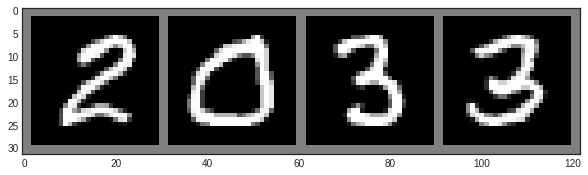

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 3, 3])
tensor([[-0.0957,  0.0171, -0.0323,  0.1322, -0.0397,  0.0449, -0.0676,  0.0444,
         -0.0321,  0.1020]], grad_fn=<AddmmBackward0>)
469
Epoch: 1, Iter: 100, Loss: 0.11499821019172668
Epoch: 1, Iter: 200, Loss: 0.11469315385818482
Epoch: 1, Iter: 300, Loss: 0.11422844970226288
Epoch: 1, Iter: 400, Loss: 0.113644340634346
Epoch: 2, Iter: 100, Loss: 0.1110863801240921
Epoch: 2, Iter: 200, Loss: 0.10649932754039765
Epoch: 2, Iter: 300, Loss: 0.09163334143161773
Epoch: 2, Iter: 400, Loss: 0.058546582460403444


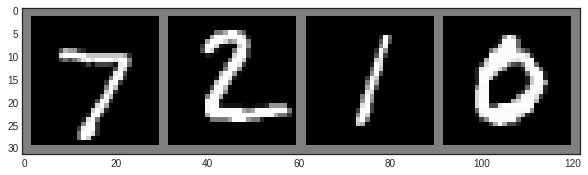

tensor([7, 2, 1, 0, 4, 1, 9, 9, 6, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 9, 2, 3, 5, 1, 2,
        9, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 9, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0,
        2, 7, 1, 9, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 5, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 9, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 9, 4, 9, 4, 9, 8,
        5, 4, 7, 6, 9, 9, 0, 5])
7	2	1	0	
82.48


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# 전처리 설정
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5, ), (0.5, ))])

# 데이터 로드 및 데이터 확인
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

image, label = next(iter(train_loader))
image.shape, label.shape

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  fig = plt.figure(figsize=(10, 5))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

net = Net()
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())

# 임의의 값을 넣어 forward 값 확인
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

# 손실함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer.zero_grad : 가중치의 그래디언트 초기화
# loss 계산
# loss.backward()
# optmizer.step() : 업데이트

# 배치수 확인
total_batch = len(train_loader)
print(total_batch)

# 설명을 위해 epochs=2로 지정
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print("Epoch: {}, Iter: {}, Loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

# 모델의 저장 및 로드
# torch.save
# net.state_dict()를 저장
# torch.load
# load_state_dict로 모델을 로드
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

net = Net()
net.load_state_dict(torch.load(PATH))

net.parameters

# 모델 테스트
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:4]))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print(predicted)

print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct / total)